In [ ]:
# dataset - https://www.kaggle.com/zainabhaddad/reviews-cell-phones-and-accessories-5
#https://github.com/rsreetech/TextClassificationLSTMTensorFlow/blob/master/TensorFlowLSTMAmazonReviews.ipynb
# https://www.youtube.com/watch?v=DUZn8hMLnbI&list=PLNvQn5fLVQdg0PAzGPqd70w_Jhz6iDYlZ&index=6

In [ ]:
import json
import pandas as pd

In [ ]:
data = []

for line in open('/content/drive/MyDrive/MSc DS_NLP/Cell_Phones_and_Accessories_5.json','r') :
    data.append(json.loads(line))

In [ ]:
print(data[0])
df = pd.DataFrame(data)
print(len(data))

{'reviewerID': 'A30TL5EWN6DFXT', 'asin': '120401325X', 'reviewerName': 'christina', 'helpful': [0, 0], 'reviewText': "They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again", 'overall': 4.0, 'summary': 'Looks Good', 'unixReviewTime': 1400630400, 'reviewTime': '05 21, 2014'}
194439


In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4.0,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5.0,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5.0,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4.0,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5.0,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [ ]:
df.head(10)
#df = df.drop(columns=['reviewerName', 'vote','image','style'])
df1 = df.rename(columns = {'overall': 'rating', 'asin': 'productID'}, inplace = False)

In [ ]:
df1.dropna(axis = 0, how ='any',inplace=True) 
df1.drop_duplicates(subset=['rating','reviewText'],keep='first',inplace=True)

In [ ]:
print(len(df1))
df1.to_csv('/content/drive/MyDrive/MSc DS_NLP/CellPhonesRating.csv')

190722


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter


import pandas as pd
import numpy as np

import sklearn


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


import seaborn as sns

In [ ]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower()

In [ ]:
review_data= pd.read_csv("/content/drive/MyDrive/MSc DS_NLP/CellPhonesRating.csv")
print(review_data.head(10))
print(len(review_data))
print('Unique Products')
print(len(review_data.groupby('productID')))
print('Unique Users')
print(len(review_data.groupby('reviewerID')))

   Unnamed: 0      reviewerID   productID      reviewerName helpful  \
0           0  A30TL5EWN6DFXT  120401325X         christina  [0, 0]   
1           1   ASY55RVNIL0UD  120401325X          emily l.  [0, 0]   
2           2  A2TMXE2AFO7ONB  120401325X             Erica  [0, 0]   
3           3   AWJ0WZQYMYFQ4  120401325X                JM  [4, 4]   
4           4   ATX7CZYFXI1KW  120401325X  patrice m rogoza  [2, 3]   
5           5   APX47D16JOP7H  120401325X               RLH  [1, 2]   
6           6  A1JVVYYO7G56DS  120401325X       Tyler Evans  [0, 0]   
7           7   A6FGO4TBZ3QFZ  3998899561  Abdullah Albyati  [1, 2]   
8           8  A2JWEDW5FSVB0F  3998899561              Adam  [2, 3]   
9           9   A8AJS1DW7L3JJ  3998899561   Agata Majchrzak  [1, 1]   

                                          reviewText  rating  \
0  They look good and stick good! I just don't li...     4.0   
1  These stickers work like the review says they ...     5.0   
2  These are awesome and m

In [ ]:
#df = df.drop(columns=['reviewerName', 'vote','image','style'])

In [ ]:
review_data.dropna(axis = 0, how ='any',inplace=True) 
#review_data['reviewText'] = review_data['reviewText'].apply(remove_url)
review_data['reviewText'] = review_data['reviewText'].apply(clean_text)
review_data['Num_words_text'] = review_data['reviewText'].apply(lambda x:len(str(x).split())) 

print('-------Dataset --------')
print(review_data['rating'].value_counts())
print(len(review_data))
print('-------------------------')
max_review_data_sentence_length  = review_data['Num_words_text'].max()

print('Train Max Sentence Length :'+str(max_review_data_sentence_length))


-------Dataset --------
5.0    106417
4.0     39275
3.0     21068
1.0     13066
2.0     10884
Name: rating, dtype: int64
190710
-------------------------
Train Max Sentence Length :4236


In [ ]:
review_data['Num_words_text'].describe()

count    190710.000000
mean         70.462042
std         104.659018
min           0.000000
25%          21.000000
50%          36.000000
75%          77.000000
max        4236.000000
Name: Num_words_text, dtype: float64

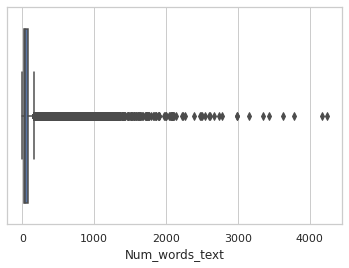

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=review_data['Num_words_text'])

In [ ]:
mask = (review_data['Num_words_text'] < 100) & (review_data['Num_words_text'] >=20)
df_short_reviews = review_data[mask]
print('No of Short reviews')
print(len(df_short_reviews))

mask = review_data['Num_words_text'] >= 100
df_long_reviews = review_data[mask]
print('No of Long reviews')
print(len(df_long_reviews))

No of Short reviews
116296
No of Long reviews
35896


In [ ]:
print(df_short_reviews['Num_words_text'].max())

99


In [ ]:
def get_sentiment(rating):
    if rating == 5 or rating == 4 or rating ==3:
        return 1
    else:
        return 0
    

In [ ]:
filtered_data = df_short_reviews.groupby('productID').filter(lambda x: len(x) >= 20)
print(len(filtered_data))
print(filtered_data ['rating'].value_counts())
filtered_data ['sentiment'] = filtered_data ['rating'].apply(get_sentiment)
#train_data = df_short_reviews.sample(n=200000, random_state =0)
train_data = filtered_data[['reviewText','sentiment']]
print('Train data')
print(train_data['sentiment'].value_counts())

#Create Test Data
mask = review_data['Num_words_text'] < 100 
df_short_reviews = review_data[mask]
filtered_data = df_short_reviews.groupby('productID').filter(lambda x: len(x) >= 10)
print(len(filtered_data))
print(filtered_data ['rating'].value_counts())
filtered_data ['sentiment'] = filtered_data ['rating'].apply(get_sentiment)
#train_data = df_short_reviews.sample(n=200000, random_state =0)
test_data = filtered_data[['reviewText','sentiment']]
print('Test data')
print(test_data['sentiment'].value_counts())

58116
5.0    33409
4.0    11404
3.0     6187
1.0     3952
2.0     3164
Name: rating, dtype: int64
Train data
1    51000
0     7116
Name: sentiment, dtype: int64
119446
5.0    69204
4.0    22604
3.0    12808
1.0     8397
2.0     6433
Name: rating, dtype: int64
Test data
1    104616
0     14830
Name: sentiment, dtype: int64


In [ ]:
train_data['sentiment'].value_counts()

1    51000
0     7116
Name: sentiment, dtype: int64

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data['reviewText'].tolist(),\
                                                      train_data['sentiment'].tolist(),\
                                                      test_size=0.5,\
                                                      stratify = train_data['sentiment'].tolist(),\
                                                      random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))

Train data len:29058
Class distributionCounter({1: 25500, 0: 3558})
Valid data len:29058
Class distributionCounter({1: 25500, 0: 3558})


In [ ]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)


print(str(tokenizer.texts_to_sequences(['xyz how are you'])))

   

[[1, 115, 20, 13]]


In [ ]:
x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(test_data['reviewText'].tolist()) )



x_train = pad_sequences(x_train, padding='post', maxlen=100)
x_valid = pad_sequences(x_valid, padding='post', maxlen=100)
x_test = pad_sequences(x_test, padding='post', maxlen=100)



train_labels = np.asarray(y_train )
valid_labels = np.asarray( y_valid)

test_labels = np.asarray(test_data['sentiment'].tolist())

print('Train data len:'+str(len(x_train)))
print('Class distribution'+str(Counter(train_labels)))

print('Validation data len:'+str(len(x_valid)))
print('Class distribution'+str(Counter(valid_labels)))

print('Test data len:'+str(len(x_test)))
print('Class distribution'+str(Counter(test_labels)))


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify

Train data len:29058
Class distributionCounter({1: 25500, 0: 3558})
Validation data len:29058
Class distributionCounter({1: 25500, 0: 3558})
Test data len:119446
Class distributionCounter({1: 104616, 0: 14830})


In [ ]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==1:
        break  

In [ ]:
max_features =50000
embedding_dim =16
sequence_length = 100

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.005))) 
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.LSTM(embedding_dim,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.005),\
                                                             bias_regularizer=regularizers.l2(0.005)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
                               



model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.BinaryAccuracy()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           800016    
                                                                 
 dropout (Dropout)           (None, 100, 16)           0         
                                                                 
 lstm (LSTM)                 (None, 100, 16)           2112      
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               819712    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4

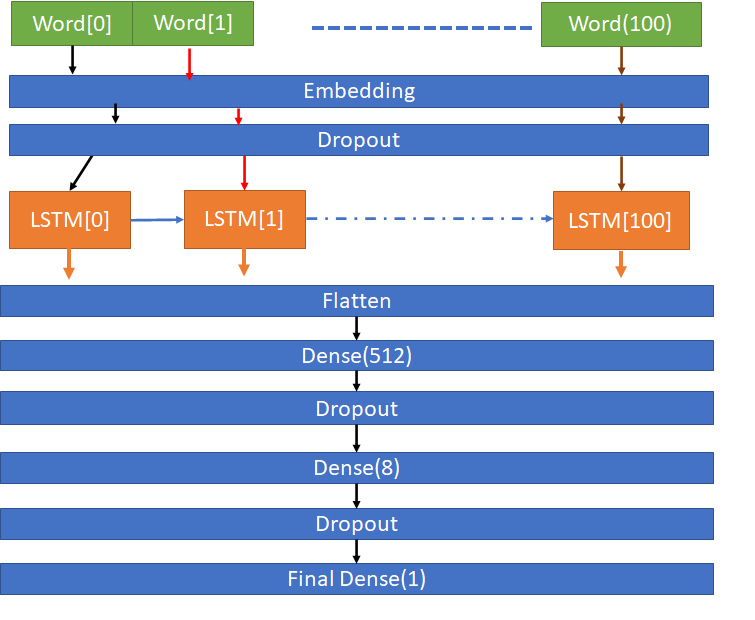

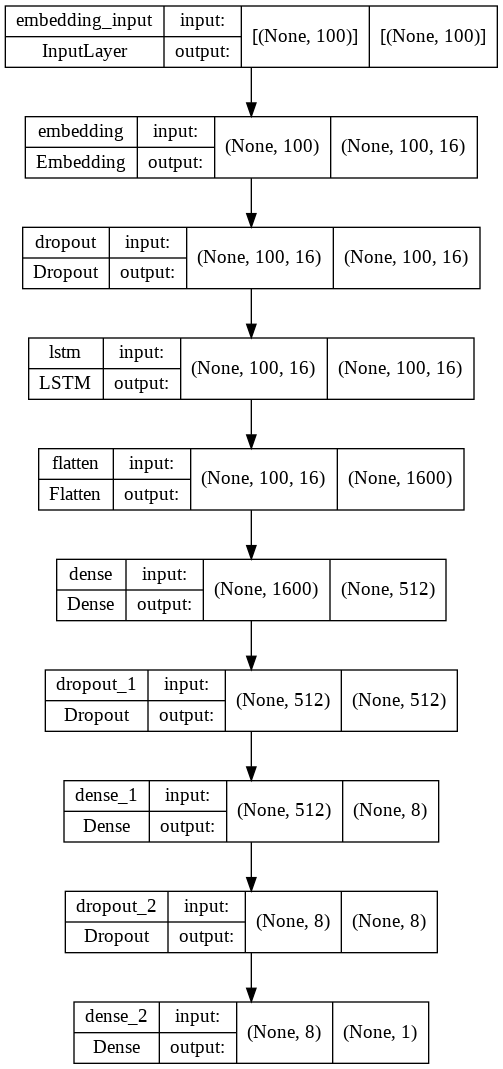

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
epochs = 10
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(5000).batch(1024),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(1024),
                    verbose=1)

Epoch 1/10
29/29 [==============================] - 32s 916ms/step - loss: 2.6556 - binary_accuracy: 0.8528 - val_loss: 1.0933 - val_binary_accuracy: 0.8776
Epoch 2/10
29/29 [==============================] - 23s 781ms/step - loss: 0.7993 - binary_accuracy: 0.8776 - val_loss: 0.5700 - val_binary_accuracy: 0.8776
Epoch 3/10
29/29 [==============================] - 16s 557ms/step - loss: 0.5560 - binary_accuracy: 0.8776 - val_loss: 0.4598 - val_binary_accuracy: 0.8776
Epoch 4/10
29/29 [==============================] - 18s 613ms/step - loss: 0.4652 - binary_accuracy: 0.8832 - val_loss: 0.4202 - val_binary_accuracy: 0.9027
Epoch 5/10
29/29 [==============================] - 18s 608ms/step - loss: 0.4397 - binary_accuracy: 0.8946 - val_loss: 0.3847 - val_binary_accuracy: 0.9048
Epoch 6/10
29/29 [==============================] - 18s 623ms/step - loss: 0.4025 - binary_accuracy: 0.9038 - val_loss: 0.3665 - val_binary_accuracy: 0.9086
Epoch 7/10
29/29 [==============================] - 16s 56

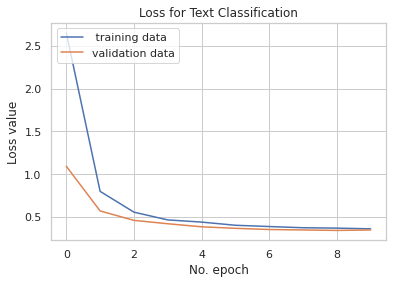

In [ ]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

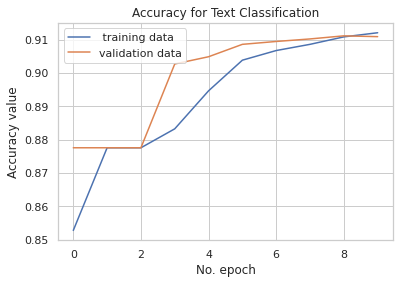

In [ ]:
plt.plot(history.history['binary_accuracy'], label=' training data')
plt.plot(history.history['val_binary_accuracy'], label='validation data')
plt.title('Accuracy for Text Classification')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/MSc DS_NLP/tf_lstmmodel.h5') 
json_string = tokenizer.to_json()

In [ ]:
import json
with open('/content/drive/MyDrive/MSc DS_NLP/tokenizer.json', 'w') as outfile:
    json.dump(json_string, outfile)

In [ ]:
valid_predict= model.predict(x_valid)

In [ ]:
print(valid_predict[:10])

[[0.99888813]
 [0.9908123 ]
 [0.9994893 ]
 [0.96325284]
 [0.99695224]
 [0.9218442 ]
 [0.7051475 ]
 [0.99984086]
 [0.8532617 ]
 [0.9991517 ]]


In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, thresholds = sklearn.metrics.roc_curve(labels, predictions)
    plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives Rate')
    plt.ylabel('True positives Rate')
    plt.xlim([-0.03, 1.0])
    plt.ylim([0.0, 1.03])
    plt.grid(True)
    thresholdsLength = len(thresholds)
    thresholds_every = 1000
    colorMap = plt.get_cmap('jet', thresholdsLength)
    for i in range(0, thresholdsLength, thresholds_every):
        threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
        plt.text(fp[i] - 0.03, tp[i] + 0.001, threshold_value_with_max_four_decimals, fontdict={'size': 15}, color=colorMap(i/thresholdsLength));

    ax = plt.gca()
    ax.set_aspect('equal')

In [ ]:
mpl.rcParams['figure.figsize'] = (16, 16)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

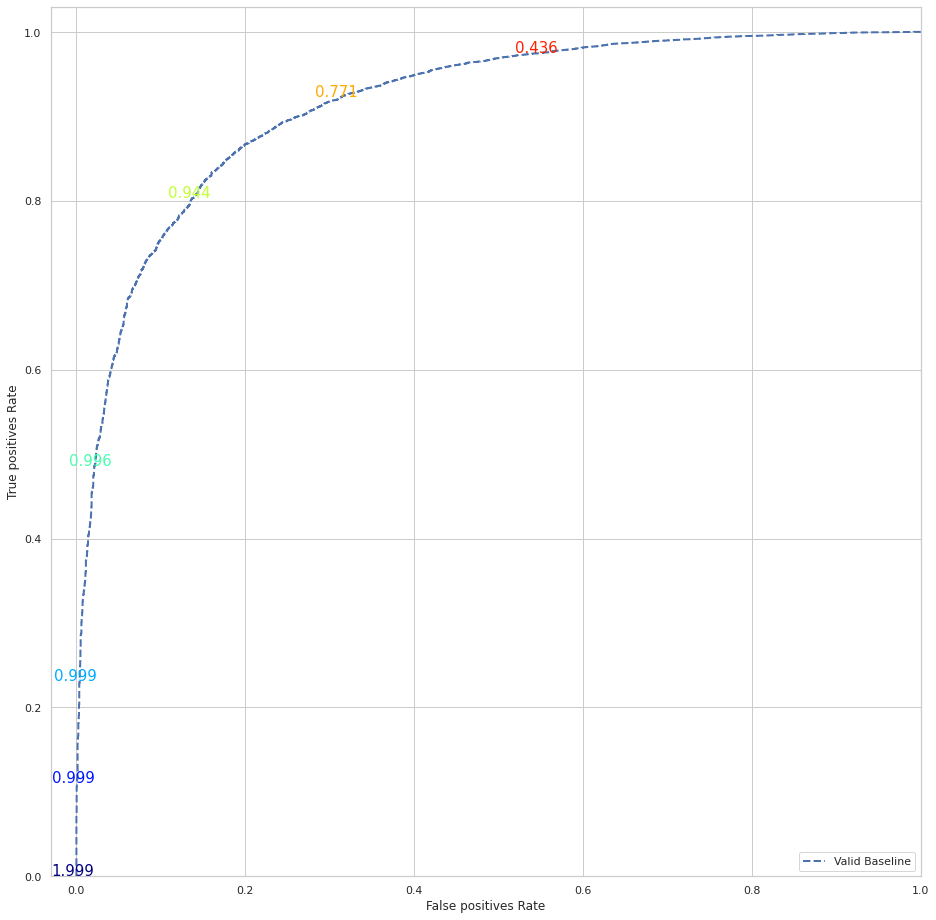

In [ ]:
plot_roc("Valid Baseline", valid_labels, valid_predict, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/MSc DS_NLP/tf_lstmmodel.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           800016    
                                                                 
 dropout (Dropout)           (None, 100, 16)           0         
                                                                 
 lstm (LSTM)                 (None, 100, 16)           2112      
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               819712    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4

In [ ]:
with open('/content/drive/MyDrive/MSc DS_NLP/tokenizer.json') as json_file:
    json_string = json.load(json_file)
tokenizer1 = tf.keras.preprocessing.text.tokenizer_from_json(json_string)

In [ ]:
x_test  = np.array( tokenizer.texts_to_sequences(test_data['reviewText'].tolist()) )
x_test = pad_sequences(x_test, padding='post', maxlen=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
print("Generate predictions for all samples")
predictions = new_model.predict(x_test)

Generate predictions for all samples


In [ ]:
test_data['pred_sentiment']= predictions
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment >= 0.78),1,test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment < 0.78),0,test_data.pred_sentiment)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
labels = [0, 1]
    
print(classification_report(test_data['sentiment'].tolist(),test_data['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.59      0.72      0.65     14830
           1       0.96      0.93      0.94    104616

    accuracy                           0.90    119446
   macro avg       0.77      0.83      0.80    119446
weighted avg       0.91      0.90      0.91    119446



In [ ]:
# define 5 documents 
docs = ['Hello Hello hello', 
'Amrita amrita', 
'this is amrita'] 

# create the tokenizer
t = Tokenizer()

t.fit_on_texts(docs)

encoded_docs = t.texts_to_matrix(docs, mode='binary')

print(encoded_docs)

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1.]]
